In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum().sum()

0

In [7]:
X = df.iloc[:,:8].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
y = df.iloc[:,8].values


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.24, random_state = 34)

In [44]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(splitter = 'best', criterion ='entropy')

In [35]:
clf = clf.fit(X_train, y_train)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_pred))

[[113  40]
 [ 37  41]]


In [38]:
print(metrics.accuracy_score(y_test, y_pred))

0.6666666666666666


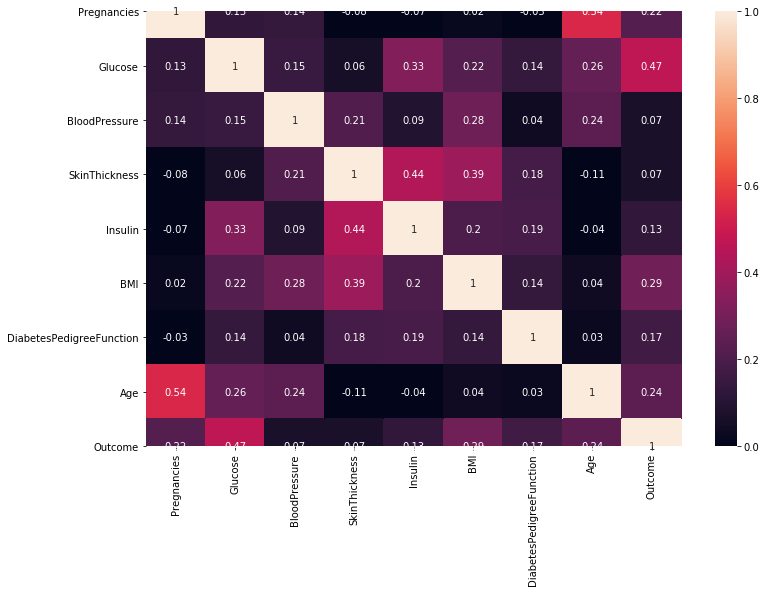

In [39]:
fig, ax = plt.subplots(figsize = (12,8))

corr_matrix = df.corr().round(2)
sns.heatmap(data = corr_matrix , vmin = 0, vmax = 1, annot = True);

# Random Forest on Diabetes Dataset

In [55]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100)
model = model.fit(X_train, y_train)

In [56]:
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm)

print(cm_train)

[[77 22]
 [18 37]]
[[401   0]
 [  0 213]]


In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_train, y_train_pred))

0.7402597402597403
1.0


# Bagging 

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt_bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 7), n_estimators = 120, bootstrap =True, oob_score = True, random_state = 42)
dt_bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=7,
                                                        splitter='best'),
       

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt_bag_clf.predict(X_test)

print("Bagging Classifier Score:", accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Bagging Classifier Score: 0.7675675675675676
Confusion Matrix: [[101  21]
 [ 22  41]]
